In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct

In [2]:
from collections import Counter

In [3]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [4]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')
lhg_rtu_path = os.path.join(main_dir, r'lhg_rtu.csv')

In [5]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [6]:
lhg_rtu = pd.read_csv(lhg_rtu_path, sep=',', index_col=0) # , skiprows=1
lhg_rtu.index = pd.to_datetime(lhg_rtu.index, format='%Y-%m-%d %H:%M:%S') + pd.DateOffset(hours=1)

In [7]:
# # Ausreißer manuell auf np.nan setzen
# WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

# WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan
# WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

# L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan
# L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [8]:
# precipitation_type für WS100

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [9]:
# nan Auswertung

In [10]:
print('WS100')
fct.nan_nonan_ratio(WS100_rtu, 'precipitation.1')
fct.nan_nonan_ratio(WS100_rtu, 'precipitation.2')
print('\n')
print('WS300')
fct.nan_nonan_ratio(WS300_rtu, 'precipitation.1')
print('\n')
print('Raine')
fct.nan_nonan_ratio(Raine_rtu, 'Niederschlagsmenge')
print('\n')
print('L_pcp')
fct.nan_nonan_ratio(L_pcp_rtu, 'rr_07')
fct.nan_nonan_ratio(L_pcp_rtu, 'rr_09')
fct.nan_nonan_ratio(L_pcp_rtu, 'rr_10')

WS100
count of nans: 8 
length of data: 1051019 
Ratio of nan/nonan: 0.0 %
count of nans: 8 
length of data: 1051019 
Ratio of nan/nonan: 0.0 %


WS300
count of nans: 493811 
length of data: 1575142 
Ratio of nan/nonan: 31.35 %


Raine
count of nans: 193 
length of data: 772077 
Ratio of nan/nonan: 0.02 %


L_pcp
count of nans: 2660 
length of data: 2266560 
Ratio of nan/nonan: 0.12 %
count of nans: 2660 
length of data: 2266560 
Ratio of nan/nonan: 0.12 %
count of nans: 2660 
length of data: 2266560 
Ratio of nan/nonan: 0.12 %


In [11]:
x = fct.longest_nan_sequence(WS100_rtu, 'precipitation.1')
print(x)
x = fct.longest_nan_sequence(WS100_rtu, 'precipitation.2')
print(x)
print('\n')
x = fct.longest_nan_sequence(WS300_rtu, 'precipitation.1')
print(x)
print('\n')
x = fct.longest_nan_sequence(Raine_rtu, 'Niederschlagsmenge')
print(x)
print('\n')
x = fct.longest_nan_sequence(L_pcp_rtu, 'rr_07')
print(x)
x = fct.longest_nan_sequence(L_pcp_rtu, 'rr_09')
print(x)
x = fct.longest_nan_sequence(L_pcp_rtu, 'rr_10')
print(x)


{'precipitation.1': 3}
{'precipitation.2': 3}


{'precipitation.1': 493798}


{'Niederschlagsmenge': 159}


{'rr_07': 1390}
{'rr_09': 1390}
{'rr_10': 1390}


In [12]:
def list_nan_sequences(dataframe, column, min_len):

    dataframe = dataframe
    dataframe_mask = dataframe.isna()
    column = column

    list = []

    count = 0
    index_count = 0

    for value in dataframe_mask[column]:
        if value == True:
            if count == 0:    
                index_start = dataframe[column].index[index_count]
                count += 1
            else:
                count += 1
                if dataframe[column].index[index_count] == dataframe[column].index[-1]:
                    index_end = dataframe[column].index[index_count]
                    if count < min_len:
                        pass
                    else:
                        list.append([count, index_start, index_end])

        else:
            if count == 0:
                pass
            else:
                index_end = dataframe[column].index[index_count - 1]
                if count < min_len:
                    pass
                else:
                    list.append([count, index_start, index_end])
                count = 0
        index_count += 1

    print('Count of nan sequences with min len ' + str(min_len) + ':', len(list))

    return list

In [14]:
# print(list_nan_sequences(WS100_rtu, 'precipitation.1', 0))
# print(list_nan_sequences(WS300_rtu, 'precipitation.1', 0))
# print(list_nan_sequences(Raine_rtu, 'Niederschlagsmenge', 0))
# print(list_nan_sequences(L_pcp_rtu, 'rr_07', 5))
# print(list_nan_sequences(L_pcp_rtu, 'rr_09', 5))
# print(list_nan_sequences(L_pcp_rtu, 'rr_10', 5))

In [15]:
def i_nans_before_peak(data, station, quantile):

    # if y == 'pr':
    #     timegap = datetime.timedelta(hours=1)
    # elif y == 'sc':
    #     timegap = datetime.timedelta(minutes=5)

    timegap = datetime.timedelta(minutes=1)

    dataframe = data[station]

    peaks = dataframe[dataframe > dataframe.quantile(quantile)]
    
    for index_peak in peaks.index:
        count = 0
        for i in reversed(dataframe.loc[: index_peak - timegap].isna()):
            if i == True:
                count += 1
            else:
                if count > 0:
                    print(count, 'leading nans before', index_peak)
                    break
                else:
                    # print('no leading nans before', index_peak)
                    break      
    return

In [16]:
# print(i_nans_before_peak(WS100_rtu, 'precipitation.1', 0.9))

In [17]:
# print(i_nans_before_peak(WS300_rtu, 'precipitation.1', 0.9))

In [18]:
# print(i_nans_before_peak(Raine_rtu, 'Niederschlagsmenge', 0.9))

In [19]:
# print(i_nans_before_peak(L_pcp_rtu, 'rr_07', 0.9))
# print(i_nans_before_peak(L_pcp_rtu, 'rr_09', 0.9))
# print(i_nans_before_peak(L_pcp_rtu, 'rr_10', 0.9))

In [20]:
def list_nan_sequences(dataframe, column, min_len):

    dataframe = dataframe
    dataframe_mask = dataframe.isna()
    column = column

    list = []

    count = 0
    index_count = 0

    for value in dataframe_mask[column]:
        if value == True:
            if count == 0:    
                index_start = dataframe[column].index[index_count]
                count += 1
            else:
                count += 1
                if dataframe[column].index[index_count] == dataframe[column].index[-1]:
                    index_end = dataframe[column].index[index_count]
                    if count < min_len:
                        pass
                    else:
                        list.append(count) # , index_start, index_end])

        else:
            if count == 0:
                pass
            else:
                index_end = dataframe[column].index[index_count - 1]
                if count < min_len:
                    pass
                else:
                    list.append(count) # , index_start, index_end])
                count = 0
        index_count += 1

    print('Count of nan sequences with min len ' + str(min_len) + ':', len(list))
    Counter(list)

    return list

In [21]:
WS100_list = list_nan_sequences(WS100_rtu, 'precipitation.1', 1)
WS300_list = list_nan_sequences(WS300_rtu, 'precipitation.1', 1)
Raine_list = list_nan_sequences(Raine_rtu, 'Niederschlagsmenge', 1)
rr07_list = list_nan_sequences(L_pcp_rtu, 'rr_07', 1)
rr09_list = list_nan_sequences(L_pcp_rtu, 'rr_09', 1)
rr10_list = list_nan_sequences(L_pcp_rtu, 'rr_10', 1)

Count of nan sequences with min len 1: 4
Count of nan sequences with min len 1: 8
Count of nan sequences with min len 1: 3
Count of nan sequences with min len 1: 32
Count of nan sequences with min len 1: 32
Count of nan sequences with min len 1: 32


In [22]:
lhg05_list = list_nan_sequences(lhg_rtu, 'lhg05', 1)
lhg07_list = list_nan_sequences(lhg_rtu, 'lhg07', 1)
lhg09_list = list_nan_sequences(lhg_rtu, 'lhg09', 1)
lhg10_list = list_nan_sequences(lhg_rtu, 'lhg10', 1)
lhg11_list = list_nan_sequences(lhg_rtu, 'lhg11', 1)

Count of nan sequences with min len 1: 8959
Count of nan sequences with min len 1: 8729
Count of nan sequences with min len 1: 385
Count of nan sequences with min len 1: 7281
Count of nan sequences with min len 1: 5623


In [23]:
counter = Counter(x)

In [24]:
a, b = np.unique(x, return_counts=True)

In [25]:
# counter

In [26]:
counter[17]

0

In [27]:
# np.percentile(x, 94)

In [28]:
absolute_frequencies = np.unique(lhg05_list, return_counts=True)

# Berechnen Sie die relative Häufigkeit jeder Kategorie
relative_frequencies = absolute_frequencies[1] / len(lhg05_list)

print("Absolute Frequencies: ", dict(zip(absolute_frequencies[0], absolute_frequencies[1])))
print("Relative Frequencies: ", dict(zip(absolute_frequencies[0], relative_frequencies)))

Absolute Frequencies:  {1: 5354, 2: 1827, 3: 340, 4: 236, 5: 139, 6: 115, 7: 76, 8: 64, 9: 45, 10: 56, 11: 36, 12: 33, 13: 37, 14: 19, 15: 30, 16: 28, 17: 17, 18: 17, 19: 21, 20: 16, 21: 12, 22: 11, 23: 10, 24: 11, 25: 8, 26: 8, 27: 9, 28: 4, 29: 11, 30: 7, 31: 7, 32: 7, 33: 11, 34: 7, 35: 9, 36: 5, 37: 10, 38: 7, 39: 6, 40: 2, 41: 3, 42: 5, 43: 8, 45: 3, 46: 4, 47: 5, 48: 5, 49: 9, 50: 4, 51: 8, 52: 5, 53: 3, 54: 2, 55: 4, 56: 3, 58: 6, 59: 1, 60: 2, 61: 7, 62: 2, 63: 2, 64: 2, 65: 2, 66: 3, 67: 4, 69: 2, 70: 1, 71: 3, 72: 2, 73: 2, 74: 1, 75: 2, 79: 2, 81: 2, 82: 1, 83: 2, 84: 2, 85: 3, 86: 4, 87: 1, 88: 2, 89: 1, 90: 1, 91: 5, 93: 1, 96: 1, 98: 2, 100: 1, 101: 2, 102: 2, 104: 2, 105: 3, 106: 2, 107: 3, 108: 4, 109: 4, 110: 2, 111: 1, 112: 3, 113: 3, 114: 2, 115: 2, 116: 4, 117: 2, 118: 4, 120: 2, 121: 1, 122: 5, 124: 3, 125: 3, 126: 1, 127: 1, 128: 1, 129: 3, 130: 1, 132: 2, 133: 1, 134: 2, 135: 2, 136: 1, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 143: 2, 144: 3, 145: 1, 146: 1, 152: 

In [29]:
list_station_list = [WS100_list, WS300_list, Raine_list, rr07_list, rr09_list, rr10_list, lhg05_list, lhg07_list, lhg09_list, lhg10_list, lhg11_list]

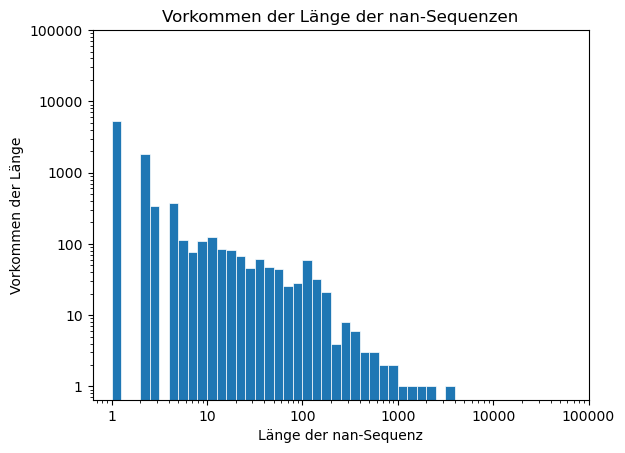

In [30]:
fig, ax = plt.subplots()

station = lhg05_list

absolute_frequencies = np.unique(station, return_counts=True)

# bins = np.logspace(np.log10(min(station)), np.log10(max(station)), num=50)
bins = np.logspace(0, 4, num=41)

ax.hist(station, bins=bins, linewidth=0.5, edgecolor="white")

plt.xscale('log')
ticks = [10**i for i in range(6)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.xticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

plt.yscale('log')
ticks = [10**i for i in range(6)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.yticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

# ax.set(xlim=(0, max(absolute_frequencies[0])),
#        ylim=(0, max(absolute_frequencies[1])))

plt.xlabel('Länge der nan-Sequenz')
plt.ylabel('Vorkommen der Länge')
plt.title('Vorkommen der Länge der nan-Sequenzen')

plt.show()

In [31]:
# absolute_frequencies[0]: Lückenlänge
# absolute_frequencies[1]: Anzahl der Lücken dieser Länge

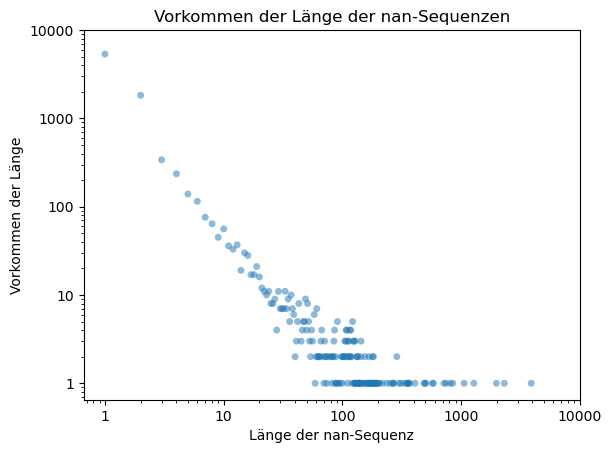

In [32]:
station = lhg05_list

absolute_frequencies = np.unique(station, return_counts=True)

x = absolute_frequencies[0]
y = absolute_frequencies[1]

# size and color:
# sizes = np.random.uniform(15, 80, len(x))
# colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, marker='.', alpha=0.5, edgecolors='none', s=100)

plt.xscale('log')
ticks = [10**i for i in range(5)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.xticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

plt.yscale('log')
plt.yticks(ticks, labels=ticks)  # Setzt die y-Achsenwerte und -Beschriftungen

plt.xlabel('Länge der nan-Sequenz')
plt.ylabel('Vorkommen der Länge')
plt.title('Vorkommen der Länge der nan-Sequenzen')

plt.show()


In [33]:
station = lhg05_list

absolute_frequencies = np.unique(station, return_counts=True)

x = absolute_frequencies[0]
y = absolute_frequencies[1]

# absolute_frequencies

In [34]:
groups_längen = [absolute_frequencies[0][i:i+10] for i in range(0, len(absolute_frequencies[0]), 10)]

In [35]:
# groups_längen

In [36]:
groups_vorkommen = [absolute_frequencies[1][i:i+10] for i in range(0, len(absolute_frequencies[1]), 10)]

In [37]:
groups_vorkommen_sums = [sum(group) for group in groups_vorkommen]

In [38]:
print(groups_vorkommen_sums)

[8252, 254, 91, 71, 54, 35, 23, 20, 18, 27, 28, 15, 13, 12, 12, 11, 10, 10, 3]


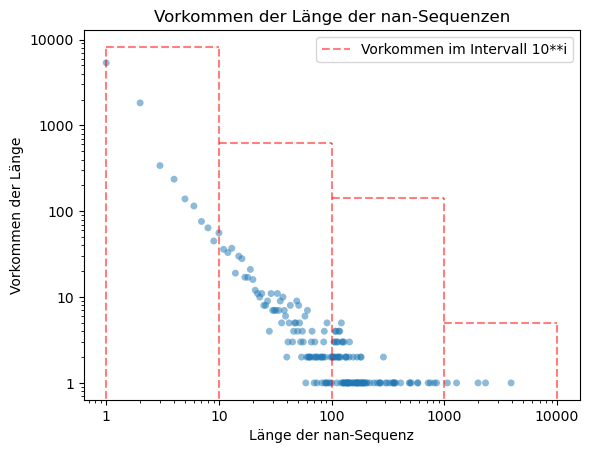

In [39]:
# make the data

station = lhg05_list

absolute_frequencies = np.unique(station, return_counts=True)

x = absolute_frequencies[0]
y = absolute_frequencies[1]

# size and color:
# sizes = np.random.uniform(15, 80, len(x))
# colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, marker='.', alpha=0.5, edgecolors='none', s=100)

plt.hlines(8196, 1, 10, color='r', linestyle='--', alpha=0.5, label='Vorkommen im Intervall 10**i')
plt.hlines(617, 10, 100, color='r', linestyle='--', alpha=0.5)
plt.hlines(141, 100, 1000, color='r', linestyle='--', alpha=0.5)
plt.hlines(5, 1000, 10000, color='r', linestyle='--', alpha=0.5)

plt.vlines(1, 0, 8196, color='r', linestyle='--', alpha=0.5)
plt.vlines(10, 0, 8196, color='r', linestyle='--', alpha=0.5)
plt.vlines(100, 0, 617, color='r', linestyle='--', alpha=0.5)
plt.vlines(1000, 0, 141, color='r', linestyle='--', alpha=0.5)
plt.vlines(10000, 0, 5, color='r', linestyle='--', alpha=0.5)

plt.xscale('log')
ticks = [10**i for i in range(5)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.xticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

plt.yscale('log')
plt.yticks(ticks, labels=ticks)  # Setzt die y-Achsenwerte und -Beschriftungen

plt.xlabel('Länge der nan-Sequenz')
plt.ylabel('Vorkommen der Länge')
plt.title('Vorkommen der Länge der nan-Sequenzen')

plt.legend()

plt.show()


In [40]:
# Anzahl von nan-Sequenzen in jeweiligem Intervallen

station = lhg05_list

for i in range(1, 6):
    interval = f'{10**(i-1)} <= x < {10**i}'
    print(interval, ':', len([x for x in station if 10**(i-1) <= x < 10**i]))
    list_vorkommen_log10_abstand = [len([x for x in station if 10**(i-1) <= x < 10**i]) for i in range(1, 6)]


1 <= x < 10 : 8196
10 <= x < 100 : 617
100 <= x < 1000 : 141
1000 <= x < 10000 : 5
10000 <= x < 100000 : 0


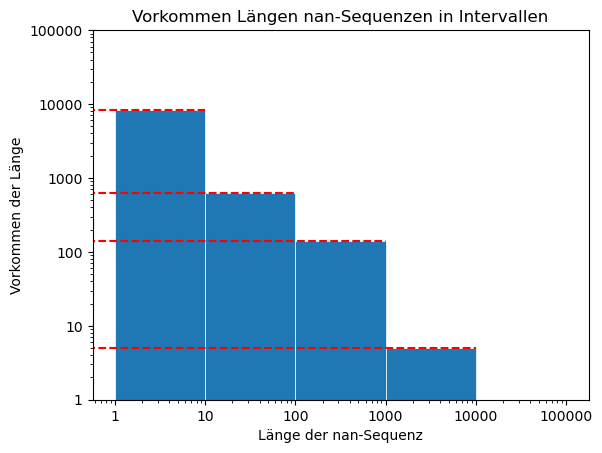

In [41]:
fig, ax = plt.subplots()

station = lhg05_list

bins = [1, 10, 100, 1000, 10000, 100000]
hist = np.histogram(station, bins=bins)[0]

ax.hist(station, bins=bins, linewidth=0.5, edgecolor="white")

plt.hlines(hist[0], 0, 10, color='r', linestyle='--')
plt.hlines(hist[1], 0, 100, color='r', linestyle='--')
plt.hlines(hist[2], 0, 1000, color='r', linestyle='--')
plt.hlines(hist[3], 0, 10000, color='r', linestyle='--')
plt.hlines(hist[4], 0, 100000, color='r', linestyle='--')

plt.xscale('log')
ticks = [10**i for i in range(6)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.xticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

plt.yscale('log')
ticks = [10**i for i in range(6)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.yticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

plt.xlabel('Länge der nan-Sequenz')
plt.ylabel('Vorkommen der Länge')
plt.title('Vorkommen Längen nan-Sequenzen in Intervallen')

plt.show()

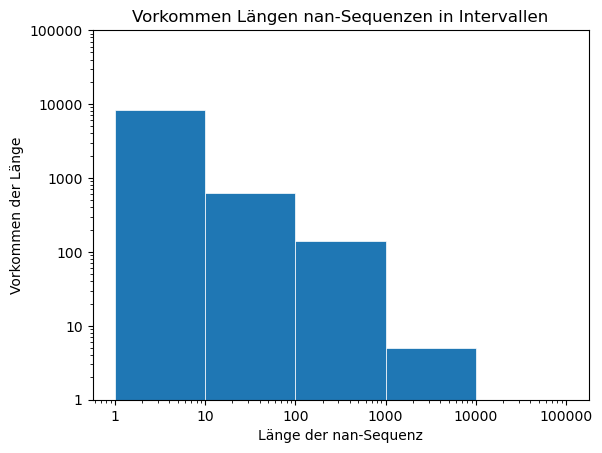

In [42]:
station = lhg05_list

fig, ax = plt.subplots()

bins = [1, 10, 100, 1000, 10000, 100000]
hist = np.histogram(station, bins=bins)[0]

ax.hist(station, bins=bins, linewidth=0.5, edgecolor="white")

plt.xscale('log')
ticks = [10**i for i in range(6)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.xticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

plt.yscale('log')
ticks = [10**i for i in range(6)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.yticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

plt.xlabel('Länge der nan-Sequenz')
plt.ylabel('Vorkommen der Länge')
plt.title('Vorkommen Längen nan-Sequenzen in Intervallen')

plt.show()

In [78]:
def histogramm(station, column):

    list_nan_sequ = fct.list_nan_sequences(station, column, 1)

    fig, ax = plt.subplots()

    if max(list_nan_sequ) <= 1000:
        set_log = 3
    elif max(list_nan_sequ) <= 10000:
        set_log = 4
    elif max(list_nan_sequ) <= 100000:
        set_log = 5
    elif max(list_nan_sequ) <= 1000000:
        set_log = 6

    bins = [10**i for i in range(set_log)]

    hist = np.histogram(station, [10**i for i in range(set_log)])[0]

    if max(hist) <= 1000:
        set_log_y = 5
    elif max(hist) <= 10000:
        set_log_y = 6
    elif max(hist) <= 100000:
        set_log_y = 7
    elif max(hist) <= 1000000:
        set_log_y = 8

    ax.hist(list_nan_sequ, bins=bins, linewidth=0.5, edgecolor="white")

    plt.xscale('log')
    ticks = [10**i for i in range(set_log)]
    plt.xticks(ticks, labels=ticks)

    plt.yscale('log')
    ticks = [10**i for i in range(set_log_y)]
    plt.yticks(ticks, labels=ticks)
    
    plt.xlabel('Länge der nan-Sequenz')
    plt.ylabel('Vorkommen der Länge')
    plt.title('Vorkommen Längen nan-Sequenzen in Intervallen')

    plt.show()

Count of nan sequences with min len 1: 8729


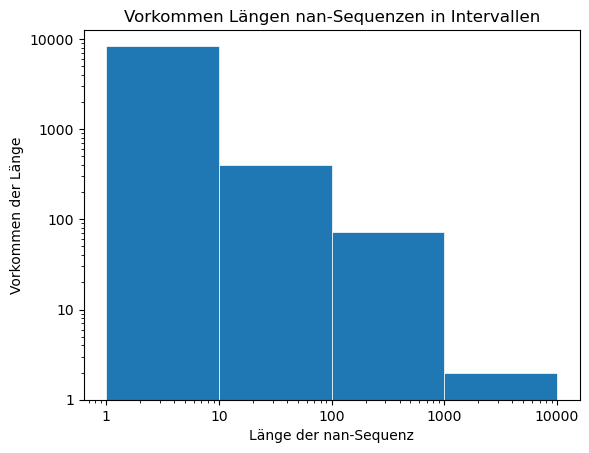

In [79]:
histogramm(lhg_rtu, 'lhg07')